# Importare le Librerie Necessarie

In [1]:
import numpy as np
import pandas as pd
import gym
from gym import spaces
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import os
import torch
from stable_baselines3.common.utils import set_random_seed

In [2]:
# # Imposta il seme per la riproducibilità
# seed_value = 42

# random.seed(seed_value)
# np.random.seed(seed_value)
# torch.manual_seed(seed_value)
# set_random_seed(seed_value)

# Lettura dati

In [3]:
pd.read_csv('Bitcoin (€) da yfinance dal 17-09-2014 al 24-04-2024.csv')

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2014-09-17 00:00:00+00:00,359.546204,361.468506,351.586884,355.957367,16389166,0.0,0.0
1,1,2014-09-18 00:00:00+00:00,355.588409,355.505402,319.789459,328.539368,26691849,0.0,0.0
2,2,2014-09-19 00:00:00+00:00,328.278503,330.936707,298.921021,307.761139,29560103,0.0,0.0
3,3,2014-09-20 00:00:00+00:00,307.665253,329.978180,303.931244,318.758972,28736826,0.0,0.0
4,4,2014-09-21 00:00:00+00:00,318.120514,321.504517,306.502197,310.632446,20702625,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3503,3503,2024-04-20 00:00:00+00:00,59675.082031,61440.464844,56170.074219,59876.710938,46818669689,0.0,0.0
3504,3504,2024-04-21 00:00:00+00:00,59883.777344,61376.257812,59247.250000,60956.074219,21662346331,0.0,0.0
3505,3505,2024-04-22 00:00:00+00:00,60954.554688,61639.593750,60245.773438,60919.242188,19240933719,0.0,0.0
3506,3506,2024-04-23 00:00:00+00:00,60927.675781,63113.457031,60496.617188,62729.296875,26544206489,0.0,0.0


In [4]:
dati_originali = pd.read_csv('Bitcoin (€) da yfinance dal 17-09-2014 al 24-04-2024.csv')
dati_originali = dati_originali[['Date', 'Close', 'Open', 'High', 'Low', 'Volume']]
dati_originali = dati_originali.rename(columns = {'Date':'Timestamp', 'Close': 'Price'})
dati_originali['Timestamp'] = pd.to_datetime(dati_originali['Timestamp'])
dati_originali['Timestamp'] = dati_originali['Timestamp'].dt.strftime('%Y-%m-%d')
dati_originali['Timestamp'] = pd.to_datetime(dati_originali['Timestamp'], format='%Y-%m-%d')
dati_originali

,Timestamp,Price,Open,High,Low,Volume
0,2014-09-17,355.957367,359.546204,361.468506,351.586884,16389166
1,2014-09-18,328.539368,355.588409,355.505402,319.789459,26691849
2,2014-09-19,307.761139,328.278503,330.936707,298.921021,29560103
3,2014-09-20,318.758972,307.665253,329.978180,303.931244,28736826
4,2014-09-21,310.632446,318.120514,321.504517,306.502197,20702625
...,...,...,...,...,...,...
3503,2024-04-20,59876.710938,59675.082031,61440.464844,56170.074219,46818669689
3504,2024-04-21,60956.074219,59883.777344,61376.257812,59247.250000,21662346331
3505,2024-04-22,60919.242188,60954.554688,61639.593750,60245.773438,19240933719
3506,2024-04-23,62729.296875,60927.675781,63113.457031,60496.617188,26544206489


In [5]:
data_inizio = '2014-09-17'
data_fine = '2023-12-31'
indice_inizio = dati_originali[dati_originali['Timestamp'] == data_inizio].index[0]
indice_fine = dati_originali[dati_originali['Timestamp'] == data_fine].index[0]
dati = dati_originali[indice_inizio:indice_fine + 1].reset_index(drop=True)
dati

,Timestamp,Price,Open,High,Low,Volume
0,2014-09-17,355.957367,359.546204,361.468506,351.586884,16389166
1,2014-09-18,328.539368,355.588409,355.505402,319.789459,26691849
2,2014-09-19,307.761139,328.278503,330.936707,298.921021,29560103
3,2014-09-20,318.758972,307.665253,329.978180,303.931244,28736826
4,2014-09-21,310.632446,318.120514,321.504517,306.502197,20702625
...,...,...,...,...,...,...
3388,2023-12-27,38504.562500,39568.429688,39571.453125,37778.320312,27190965041
3389,2023-12-28,39108.300781,38502.812500,39345.335938,38217.789062,22740505379
3390,2023-12-29,38515.289062,39131.113281,39415.761719,38211.789062,20773907848
3391,2023-12-30,38080.046875,38503.351562,38997.976562,37469.179688,23517721045


# Preparazione dei Periodi di 30 Giorni e train_test_split

In [6]:
# Estrarre periodi di lunghezza 30 giorni dai dati
L = 30
periods = [dati.iloc[i:i + L] for i in range(len(dati) - L + 1)]

# Suddivisione dei periodi in train (70%) e validation/test (30%)
train_periods, validation_periods = train_test_split(periods, test_size=0.3, random_state=42)
validation_periods, test_periods = train_test_split(validation_periods, test_size=0.5, random_state=42)

# Visualizzare il numero di periodi in ciascun insieme
print(f"Train periods: {len(train_periods)}, Validation periods: {len(validation_periods)}, Test periods: {len(test_periods)}")

Train periods: 2354, Validation periods: 505, Test periods: 505


# Function per il calcolo del rendimento ideale

In [7]:
def calcola_rendimento_portafoglio_ideale(capitale_iniziale, bitcoin_iniziali, lista_prezzi, min_acquisto, min_vendita, perc_commissione_acquisto, perc_commissione_vendita):
    capitale = capitale_iniziale
    bitcoin = bitcoin_iniziali
    comprato = False

    for i in range(len(lista_prezzi) - 1):
        # Compra al minimo
        if lista_prezzi[i] < lista_prezzi[i + 1] and not comprato and capitale >= min_acquisto:
            bitcoin_acquistati = (capitale * (1 - perc_commissione_acquisto)) / lista_prezzi[i]
            bitcoin += bitcoin_acquistati
            capitale = 0
            comprato = True
            # print(f'Bitcoin posseduti: {bitcoin}')
        # Vende al massimo
        elif lista_prezzi[i] > lista_prezzi[i + 1] and comprato and bitcoin * lista_prezzi[i] >= min_vendita:
            capitale_vendita = bitcoin * lista_prezzi[i] * (1 - perc_commissione_vendita)
            capitale += capitale_vendita
            bitcoin = 0
            comprato = False
            # print(f'Capitale posseduto: {capitale}')

    # Vende i bitcoin rimasti all'ultimo prezzo
    if comprato and bitcoin * lista_prezzi.iloc[-1] >= min_vendita:
        capitale += bitcoin * lista_prezzi.iloc[-1] * (1 - perc_commissione_vendita)
        bitcoin = 0
        # print(f'Capitale posseduto: {capitale}')
        # print(f'Bitcoin posseduti: {bitcoin}')

    valore_iniziale = capitale_iniziale + bitcoin_iniziali * lista_prezzi[0]
    valore_finale = capitale + bitcoin * lista_prezzi.iloc[-1]

    rendimento = valore_finale / valore_iniziale

    return [rendimento, valore_finale]

# Definizione dell'Ambiente Personalizzato TradingEnv per Train e Validation

In [8]:
# class TradingEnv(gym.Env):
#     def __init__(self, periods, initial_cash=1000, initial_btc=0, L=30, info_columns=None, portfolio_metrics=None):
#         super(TradingEnv, self).__init__()
        
#         self.periods = periods
#         self.initial_cash = initial_cash
#         self.initial_btc = initial_btc
#         self.current_step = 0
#         self.current_period = None
#         self.initial_price = None
#         self.L = L  # Numero di giorni di osservazione

#         # Definisci le colonne di informazione e le metriche del portafoglio
#         self.info_columns = info_columns or ['Open', 'High', 'Low', 'Price', 'Volume']
#         self.portfolio_metrics = portfolio_metrics or ['cash', 'btc', 'total_value']

#         # Calcola la dimensione dello spazio di osservazione in base a L e al numero di colonne e metriche
#         self.num_info_columns = len(self.info_columns)
#         self.observation_size = self.L * self.num_info_columns + len(self.portfolio_metrics)
        
#         # Definisce lo spazio di azione e di osservazione
#         self.action_space = spaces.Box(low=-1, high=1, shape=(1,), dtype=np.float32)
#         self.observation_space = spaces.Box(low=0, high=np.inf, shape=(self.observation_size,), dtype=np.float32)
    
#     def reset(self):
#         # Scegli un periodo di L giorni casuale
#         self.current_period = random.choice(self.periods).reset_index(drop=True)
#         self.current_step = 0
#         self.cash = self.initial_cash
#         self.btc = self.initial_btc
#         self.initial_price = self.current_period['Price'].iloc[self.current_step]
        
#         # Costruzione delle metriche del portafoglio richieste
#         total_value = self.cash + self.btc * self.initial_price
#         portfolio_obs = []
#         if 'cash' in self.portfolio_metrics:
#             portfolio_obs.append(self.cash)
#         if 'btc' in self.portfolio_metrics:
#             portfolio_obs.append(self.btc)
#         if 'total_value' in self.portfolio_metrics:
#             portfolio_obs.append(total_value)
        
#         # Crea l'osservazione iniziale in base alle colonne di informazione e alle metriche del portafoglio
#         obs = self.current_period[self.info_columns].values[:self.current_step + 1].flatten()
#         obs = np.pad(obs, (0, self.L * self.num_info_columns - len(obs)), mode='constant')
#         obs = np.append(obs, portfolio_obs)
        
#         return obs

#     def step(self, action):
#         percentage = action[0]
#         price = self.current_period['Price'].iloc[self.current_step]

#         # Gestione dell'azione (acquisto, vendita o nessuna azione)
#         if percentage < 0:  # Vendita
#             btc_to_sell = -percentage * self.btc
#             self.btc -= btc_to_sell
#             self.cash += btc_to_sell * price
#         elif percentage > 0:  # Acquisto
#             cash_to_spend = percentage * self.cash
#             btc_bought = cash_to_spend / price
#             self.btc += btc_bought
#             self.cash -= cash_to_spend

#         # Aggiorna l'indice temporale
#         self.current_step += 1
#         done = self.current_step >= len(self.current_period) - 1

#         # Calcolo del valore totale del portafoglio
#         total_value = self.cash + self.btc * price
#         initial_total_value = self.initial_cash + self.initial_btc * self.initial_price
#         reward = total_value - initial_total_value

#         # Crea l'osservazione aggiornata basata su L giorni di info_columns e le metriche del portafoglio
#         obs = self.current_period[self.info_columns].values[:self.current_step + 1].flatten()
#         obs = np.pad(obs, (0, self.L * self.num_info_columns - len(obs)), mode='constant')
        
#         # Ricostruisce l'osservazione per le metriche del portafoglio specificate
#         portfolio_obs = []
#         if 'cash' in self.portfolio_metrics:
#             portfolio_obs.append(self.cash)
#         if 'btc' in self.portfolio_metrics:
#             portfolio_obs.append(self.btc)
#         if 'total_value' in self.portfolio_metrics:
#             portfolio_obs.append(total_value)
        
#         obs = np.append(obs, portfolio_obs)
        
#         return obs, reward, done, {}

#     def render(self):
#         total_value = self.cash + self.btc * self.current_period['Price'].iloc[self.current_step]
#         print(f'Step: {self.current_step}, Cash: {self.cash}, BTC: {self.btc}, Total Value: {total_value}')

In [9]:
class TradingEnv(gym.Env):
    def __init__(self, periods, initial_cash, initial_btc, L, info_columns, portfolio_metrics,
                 min_acquisto=0, min_vendita=0, perc_commissione_acquisto=0, perc_commissione_vendita=0):
        super(TradingEnv, self).__init__()
        
        # Inizializzazione delle variabili di input
        self.periods = periods
        self.initial_cash = initial_cash
        self.initial_btc = initial_btc
        self.current_step = 0
        self.current_period = None
        self.initial_price = None
        self.L = L  # Numero di giorni di osservazione

        # Parametri della funzione ideale
        self.min_acquisto = min_acquisto
        self.min_vendita = min_vendita
        self.perc_commissione_acquisto = perc_commissione_acquisto
        self.perc_commissione_vendita = perc_commissione_vendita

        # Definisci le colonne di informazione e le metriche del portafoglio
        self.info_columns = info_columns
        self.portfolio_metrics = portfolio_metrics

        # Calcola la dimensione dello spazio di osservazione in base a L e al numero di colonne e metriche
        self.num_info_columns = len(self.info_columns)
        self.observation_size = self.L * self.num_info_columns + len(self.portfolio_metrics)
        
        # Definisce lo spazio di azione e di osservazione
        self.action_space = spaces.Box(low=-1, high=1, shape=(1,), dtype=np.float32)
        self.observation_space = spaces.Box(low=0, high=np.inf, shape=(self.observation_size,), dtype=np.float32)
    
    def reset(self):
        # Scegli un periodo di L giorni casuale
        self.current_period = random.choice(self.periods).reset_index(drop=True)
        self.current_step = 0
        self.cash = self.initial_cash
        self.btc = self.initial_btc
        self.initial_price = self.current_period['Price'].iloc[self.current_step]
        
        # Costruzione delle metriche del portafoglio richieste
        self.valore_iniziale = self.cash + self.btc * self.initial_price
        self.lista_prezzi = [self.initial_price]
        
        # Costruzione dell'osservazione iniziale
        obs = self.get_observation()
        return obs

    def step(self, action):
        percentage = action[0]
        price = self.current_period['Price'].iloc[self.current_step]

        # Gestione dell'azione (acquisto, vendita o nessuna azione)
        if percentage < 0:  # Vendita
            btc_to_sell = -percentage * self.btc
            self.btc -= btc_to_sell
            self.cash += btc_to_sell * price
        elif percentage > 0:  # Acquisto
            cash_to_spend = percentage * self.cash
            btc_bought = cash_to_spend / price
            self.btc += btc_bought
            self.cash -= cash_to_spend

        # Aggiorna l'indice temporale
        self.current_step += 1
        done = self.current_step >= len(self.current_period) - 1

        # Calcola il valore totale del portafoglio dell’agente
        total_value = self.cash + self.btc * price

        # Aggiungi il prezzo corrente a lista_prezzi per calcolare il rendimento ideale
        self.lista_prezzi.append(price)
        
        # Calcola il rendimento ideale usando la funzione fornita
        rendimento_ideale, _ = calcola_rendimento_portafoglio_ideale(
            self.initial_cash, self.initial_btc, pd.Series(self.lista_prezzi), self.min_acquisto,
            self.min_vendita, self.perc_commissione_acquisto, self.perc_commissione_vendita
        )
        
        # Calcola il rendimento dell'agente
        rendimento_agente = total_value / self.valore_iniziale
        
        # Calcola il reward come il rapporto tra rendimento dell'agente e rendimento ideale
        reward = rendimento_agente / rendimento_ideale if rendimento_ideale != 0 else 0

        # Restituisce l'osservazione aggiornata
        obs = self.get_observation()
        
        return obs, reward, done, {}

    def get_observation(self):
        # Crea l'osservazione in base a L giorni di info_columns e le metriche del portafoglio
        obs = self.current_period[self.info_columns].values[:self.current_step + 1].flatten()
        obs = np.pad(obs, (0, self.L * self.num_info_columns - len(obs)), mode='constant')
        
        # Costruisce l'osservazione delle metriche del portafoglio
        total_value = self.cash + self.btc * self.current_period['Price'].iloc[self.current_step]
        portfolio_obs = []
        if 'cash' in self.portfolio_metrics:
            portfolio_obs.append(self.cash)
        if 'btc' in self.portfolio_metrics:
            portfolio_obs.append(self.btc)
        if 'total_value' in self.portfolio_metrics:
            portfolio_obs.append(total_value)
        
        # Aggiunge l'osservazione del portafoglio all'osservazione finale
        obs = np.append(obs, portfolio_obs)
        return obs

    def render(self):
        total_value = self.cash + self.btc * self.current_period['Price'].iloc[self.current_step]
        print(f'Step: {self.current_step}, Cash: {self.cash}, BTC: {self.btc}, Total Value: {total_value}')

# Creare gli Ambienti di Addestramento e di Validazione

In [10]:
liquidità_iniziale = 1000
bitcoin_iniziali = 0
L = 30
info_columns = ['Price'] #['Price', 'Volume'] # Scegliere tra le colonne presenti nel dataset iniziale
portfolio_metrics = [] #['cash', 'btc', 'total_value'] # Scegliere tra 'cash', 'btc' e 'total_value' (o una combinazione di questi)
train_env = TradingEnv(periods=train_periods, initial_cash=liquidità_iniziale, initial_btc=bitcoin_iniziali, L=L, info_columns=info_columns, portfolio_metrics=portfolio_metrics)
validation_env = TradingEnv(periods=validation_periods, initial_cash=liquidità_iniziale, initial_btc=bitcoin_iniziali, L=L, info_columns=info_columns, portfolio_metrics=portfolio_metrics)

# Addestrare l'Agente con Monitoraggio su validation

In [ ]:
# Addestramento dell'agente su train_env
model = PPO("MlpPolicy", train_env, verbose=1)

# Parametri per il training e l'early stopping
n_train_steps = 10000000 # Timestep totali di addestramento
n_val_timesteps = 1000 # Ogni n_val_timesteps valutiamo l'agente
patience = 100 # Numero massimo di valutazioni senza miglioramento prima dello stop
best_validation_reward = -np.inf # Reward migliore osservato finora
validation_rewards = [] # Lista dei reward di validazione
no_improvement_count = 0 # Contatore per tenere traccia delle valutazioni senza miglioramento

# Nome del file per i migliori pesi
best_model_path = f"best_model_RL_BTC_{n_train_steps}_{n_val_timesteps}_{patience}_{info_columns}_{portfolio_metrics}.zip"

# Ciclo di training con early stopping e valutazione su tutto il validation set
for step in range(0, n_train_steps, n_val_timesteps):
    # Training per n_val_timesteps
    model.learn(total_timesteps=n_val_timesteps, reset_num_timesteps=False)
    
    # Valutazione su tutto il validation_env
    rewards = []
    for period in validation_periods:
        validation_env = TradingEnv([period], initial_cash=liquidità_iniziale, initial_btc=bitcoin_iniziali, 
                                    L=L, info_columns=info_columns, portfolio_metrics=portfolio_metrics)
        obs = validation_env.reset()
        done = False
        total_reward = 0
        while not done:
            action, _states = model.predict(obs)
            obs, reward, done, _ = validation_env.step(action)
            total_reward += reward
        rewards.append(total_reward)
    
    # Calcola il reward medio su tutto il validation set
    avg_validation_reward = np.mean(rewards)
    validation_rewards.append(avg_validation_reward)
    print(f"Average validation reward at step {step + n_val_timesteps}: {avg_validation_reward}")
    
    # Early stopping logic (simile al codice precedente)
    if avg_validation_reward > best_validation_reward:
        best_validation_reward = avg_validation_reward
        no_improvement_count = 0
        model.save(best_model_path)  # Salva i migliori pesi
        print(f"New best model saved with validation reward: {avg_validation_reward}")
    else:
        no_improvement_count += 1
        print(f'no_improvement_count: {no_improvement_count}/{patience}\nbest_validation_reward: {best_validation_reward}')
    
    if no_improvement_count >= patience:
        print(f"Early stopping at step {step + n_val_timesteps} due to no improvement in validation reward.")
        break

# Ripristina i migliori pesi salvati
if os.path.exists(best_model_path):
    model = model.load(best_model_path)
    print(f"Restored the best model weights from saved file (best_validation_reward: {best_validation_reward}).")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


c:\Users\Alessandro\Desktop\Cartelle\Mie\Programmi personali in Python\Kaggle\Bitcoin Historical Dataset\trading_env\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29       |
|    ep_rew_mean     | 24.3     |
| time/              |          |
|    fps             | 246      |
|    iterations      | 1        |
|    time_elapsed    | 8        |
|    total_timesteps | 2048     |
---------------------------------
Average validation reward at step 1000: 24.75770398508834
New best model saved with validation reward: 24.75770398508834
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 29       |
|    ep_rew_mean     | 24.8     |
| time/              |          |
|    fps             | 265      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 4096     |
---------------------------------
Average validation reward at step 2000: 24.779008359430037
New best model saved with validation reward: 24.779008359430037
---------------------------------
| rollout/           |          |
|    ep_

# Test finale sui dati di test

In [ ]:
# Test finale su test_periods
test_env = TradingEnv(
    periods=test_periods, 
    initial_cash=liquidità_iniziale, 
    initial_btc=bitcoin_iniziali, 
    L=L, 
    info_columns=info_columns, 
    portfolio_metrics=portfolio_metrics
)

obs = test_env.reset()
done = False
lista_prezzi_test = [test_env.current_period['Price'].iloc[0]]  # Lista per registrare i prezzi durante il test

while not done:
    action, _states = model.predict(obs)
    obs, reward, done, _ = test_env.step(action)
    lista_prezzi_test.append(test_env.current_period['Price'].iloc[test_env.current_step])
    test_env.render()

# Calcola il rendimento finale del portafoglio dell'agente
final_value = test_env.cash + test_env.btc * test_env.current_period['Price'].iloc[test_env.current_step]
total_return = final_value / test_env.valore_iniziale  # Rendimento complessivo dell'agente

# Calcola il rendimento ideale usando la funzione `calcola_rendimento_portafoglio_ideale`
rendimento_ideale, valore_finale_ideale = calcola_rendimento_portafoglio_ideale(
    capitale_iniziale=liquidità_iniziale, 
    bitcoin_iniziali=bitcoin_iniziali, 
    lista_prezzi=pd.Series(lista_prezzi_test), 
    min_acquisto=10, 
    min_vendita=10, 
    perc_commissione_acquisto=0.001, 
    perc_commissione_vendita=0.001
)

# Stampa i risultati finali
print(f"Total return on test data: {total_return}")
print(f"Ideal return on test data: {rendimento_ideale}")
print(f"Agent's final portfolio value: {final_value}")
print(f"Ideal final portfolio value: {valore_finale_ideale}")
print(f'Punteggio rendimento:', total_return / rendimento_ideale)

Step: 1, Cash: 0.0, BTC: 3.4591943227324427, Total Value: 1082.5854141669463
Step: 2, Cash: 0.0, BTC: 3.4591943227324427, Total Value: 1081.610087740319
Step: 3, Cash: 466.06253922086216, BTC: 1.9686378754647818, Total Value: 1074.5781911103245
Step: 4, Cash: 0.0, BTC: 3.4764189229967295, Total Value: 1040.4104504638867
Step: 5, Cash: 0.0, BTC: 3.4764189229967295, Total Value: 1076.1151442639336
Step: 6, Cash: 0.0, BTC: 3.4764189229967295, Total Value: 1094.8562759395736
Step: 7, Cash: 0.0, BTC: 3.4764189229967295, Total Value: 1090.033763166022
Step: 8, Cash: 0.0, BTC: 3.4764189229967295, Total Value: 1057.283197933811
Step: 9, Cash: 776.5825027151567, BTC: 0.9229629397908559, Total Value: 1055.814338243041
Step: 10, Cash: 853.0306496281635, BTC: 0.6702739643987721, Total Value: 1058.903125457583
Step: 11, Cash: 307.73453518537144, BTC: 2.44563410871286, Total Value: 1054.0404423800387
Step: 12, Cash: 1054.0404423800387, BTC: 0.0, Total Value: 1054.0404423800387
Step: 13, Cash: 1054.0

In [ ]:
# Estrai i prezzi e le date dal periodo di test
test_dates = test_env.current_period['Timestamp']  # Assicurati che ci sia una colonna 'Timestamp' nei dati
test_prices = test_env.current_period['Price']

# Crea la figura dell'andamento dei prezzi
fig = go.Figure()

# Aggiungi una linea per l'andamento dei prezzi di test
fig.add_trace(go.Scatter(
    x=test_dates, 
    y=test_prices, 
    mode='lines',
    name='Prezzo BTC',
    line=dict(color='blue', width=2)
))

# Configurazione del layout del grafico
fig.update_layout(
    title="Andamento dei Prezzi di BTC durante il periodo di test",
    xaxis_title="Data",
    yaxis_title="Prezzo (€)",
    template="plotly_white",
    hovermode="x unified",
    width=1000,
    height=600
)

# Mostra il grafico
fig.show()

# Funzione per sapere cosa fare oggi in base al passato

In [ ]:
def get_trading_action(model, new_data):
    new_env = TradingEnv(periods=[new_data], initial_cash=liquidità_iniziale, initial_btc=bitcoin_iniziali, 
                                    L=L, info_columns=info_columns, portfolio_metrics=portfolio_metrics)
    obs = new_env.reset()
    action, _states = model.predict(obs)
    return action[0]

# Esempio di utilizzo su nuovi dati
new_data = dati.iloc[-L:]

action_today = get_trading_action(model, new_data)
print("Azione consigliata per oggi:", action_today)

Azione consigliata per oggi: 0.56311214


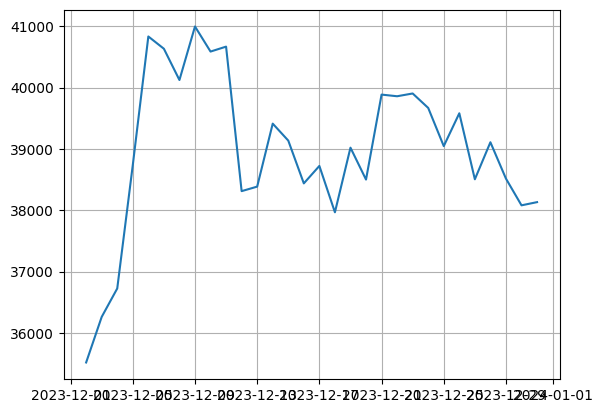

In [ ]:
plt.grid()
plt.plot(new_data['Timestamp'], new_data['Price']);

# Funzione per testare l'agente su più giorni (simulazione classica)

In [ ]:
# Funzione per simulare il trading su dati di test
def simulate_trading_on_test_data(model, dati_test_custom, L=30, initial_cash=1000, initial_btc=0):
    # Inizializza le variabili di portafoglio
    cash = initial_cash
    btc = initial_btc
    
    # Lista per accumulare i dati del log
    log_data = []
    
    # Ciclo su ogni giorno da L in poi per simulare le operazioni di trading
    for i in range(L, len(dati_test_custom)):
        # Crea la finestra dei dati passati di lunghezza L
        historical_data = dati_test_custom.iloc[i-L:i]
        
        # Estrarre il prezzo del giorno corrente
        current_price = dati_test_custom.iloc[i]['Price']
        current_timestamp = dati_test_custom.iloc[i]['Timestamp']
        
        # Usa il modello per prevedere l'azione da compiere oggi
        action = get_trading_action(model, historical_data)
        
        # Determina l'azione (acquisto, vendita o nulla)
        if action > 0:  # Acquisto
            cash_spent = action * cash
            btc_bought = cash_spent / current_price
            cash -= cash_spent
            btc += btc_bought
            action_type = 'Acquisto'
        elif action < 0:  # Vendita
            btc_sold = -action * btc
            cash_earned = btc_sold * current_price
            btc -= btc_sold
            cash += cash_earned
            action_type = 'Vendita'
        else:
            # Nessuna azione
            action_type = '-'
            cash_spent = 0
            btc_bought = 0
            cash_earned = 0
            btc_sold = 0

        # Calcola il valore totale del portafoglio alla fine della giornata
        total_value = cash + btc * current_price
        
        # Aggiungi una nuova riga al log
        log_data.append({
            'Timestamp': current_timestamp,
            'prezzo': current_price,
            'Azione': action_type,
            'Percentuale': action,
            'Liquidità spesa/guadagnata': cash_spent if action_type == 'Acquisto' else cash_earned if action_type == 'Vendita' else '-',
            'Bitcoin spesi/guadagnati': btc_bought if action_type == 'Acquisto' else btc_sold if action_type == 'Vendita' else '-',
            'Liquidità posseduta': cash,
            'bitcoin': btc,
            'valore_totale_portafoglio': total_value
        })
        
    # Converti i dati del log in un DataFrame
    log_df = pd.DataFrame(log_data)
    
    return log_df

In [ ]:
dati

,Timestamp,Price,Open,High,Low,Volume
0,2014-09-17,355.957367,359.546204,361.468506,351.586884,16389166
1,2014-09-18,328.539368,355.588409,355.505402,319.789459,26691849
2,2014-09-19,307.761139,328.278503,330.936707,298.921021,29560103
3,2014-09-20,318.758972,307.665253,329.978180,303.931244,28736826
4,2014-09-21,310.632446,318.120514,321.504517,306.502197,20702625
...,...,...,...,...,...,...
3388,2023-12-27,38504.562500,39568.429688,39571.453125,37778.320312,27190965041
3389,2023-12-28,39108.300781,38502.812500,39345.335938,38217.789062,22740505379
3390,2023-12-29,38515.289062,39131.113281,39415.761719,38211.789062,20773907848
3391,2023-12-30,38080.046875,38503.351562,38997.976562,37469.179688,23517721045


In [ ]:
# Parametri di input
initial_date = '2024-01-01'  # Data di inizio per la selezione casuale
final_date = '2024-04-24'    # Data di fine per la selezione casuale
n_days = 50                  # Numero di giorni da includere nel periodo casuale

# Filtrare i dati tra initial_date e final_date
dati_filtered = dati_originali[(dati_originali['Timestamp'] >= initial_date) & (dati_originali['Timestamp'] <= final_date)]

# Calcolare il massimo indice di partenza per un periodo di lunghezza n_days
max_start_index = len(dati_filtered) - n_days

# Selezionare un indice casuale di partenza per il periodo
if max_start_index > 0:
    start_index = random.randint(0, max_start_index)
    dati_test_custom = dati_filtered.iloc[start_index:start_index + n_days].reset_index(drop=True)
else:
    raise ValueError("L'intervallo specificato non contiene abbastanza dati per un periodo di n_days.")

# Esecuzione della simulazione di trading sui dati di test
log_df = simulate_trading_on_test_data(model, dati_test_custom)

# Visualizzare i primi risultati del log
log_df

,Timestamp,prezzo,Azione,Percentuale,Liquidità spesa/guadagnata,Bitcoin spesi/guadagnati,Liquidità posseduta,bitcoin,valore_totale_portafoglio
0,2024-02-05,39503.257812,Acquisto,0.036554,36.553619,0.000925,963.446411,0.000925,1000.000031
1,2024-02-06,39715.003906,Acquisto,1.000000,963.446411,0.024259,0.000000,0.025184,1000.195966
2,2024-02-07,40052.285156,Acquisto,1.000000,0.000000,0.000000,0.000000,0.025184,1008.690170
3,2024-02-08,41128.156250,Acquisto,1.000000,0.000000,0.000000,0.000000,0.025184,1035.785268
4,2024-02-09,42032.652344,Acquisto,0.944693,0.000000,0.000000,0.000000,0.025184,1058.564401
5,2024-02-10,43717.242188,Acquisto,1.000000,0.000000,0.000000,0.000000,0.025184,1100.989676
6,2024-02-11,44295.917969,Acquisto,1.000000,0.000000,0.000000,0.000000,0.025184,1115.563241
7,2024-02-12,44724.175781,Acquisto,1.000000,0.000000,0.000000,0.000000,0.025184,1126.348629
8,2024-02-13,46378.316406,Acquisto,0.099348,0.000000,0.000000,0.000000,0.025184,1168.007061
9,2024-02-14,46451.382812,Vendita,-0.644943,754.484476,0.016242,754.484476,0.008942,1169.847189


In [ ]:
# Funzione per calcolare la dimensione dei punti in base alla quantità e al massimo valore
def calcola_dimensione(quantita, max_quantita, min_size=10, max_size=50):
    return min_size + (max_size - min_size) * (quantita / max_quantita) if max_quantita != 0 else min_size

# Filtra gli acquisti e le vendite dal log delle transazioni
acquisti = log_df[(log_df['Azione'] == 'Acquisto') & (log_df['Liquidità spesa/guadagnata'] != 0)]
vendite = log_df[(log_df['Azione'] == 'Vendita') & (log_df['Liquidità spesa/guadagnata'] != 0)]

# Calcola il massimo valore speso per acquistare e il massimo valore guadagnato dalle vendite
max_acquisto = acquisti['Liquidità spesa/guadagnata'].max()
max_vendita = vendite['Liquidità spesa/guadagnata'].max()

# Calcola la dimensione dei punti in base al massimo valore di acquisto e vendita
dimensioni_acquisti = acquisti['Liquidità spesa/guadagnata'].apply(lambda x: calcola_dimensione(x, max_acquisto))
dimensioni_vendite = vendite['Liquidità spesa/guadagnata'].apply(lambda x: calcola_dimensione(x, max_vendita))

# Creazione del grafico dei prezzi con acquisti e vendite
fig = go.Figure()

# Linea dell'andamento dei prezzi
fig.add_trace(go.Scatter(
    x=log_df['Timestamp'],
    y=log_df['prezzo'],
    mode='lines',
    name='Prezzi Bitcoin',
    line=dict(color='blue', width=2),
    hoverinfo='x+y'
))

# Scatter plot per gli acquisti con dimensione proporzionale al valore speso
fig.add_trace(go.Scatter(
    x=acquisti['Timestamp'],
    y=acquisti['prezzo'],
    mode='markers',
    name='Acquisti',
    marker=dict(color='green', size=dimensioni_acquisti, opacity=0.7),
    text=[
        f"Timestamp: {timestamp}<br>Prezzo: {prezzo} €<br>Percentuale Acquisto: {round(percentuale * 100, 2)}%<br>Liquidità Spesa: {round(liquid_spesa, 2)} €<br>Bitcoin Acquistati: {round(btc_acq, 6)}<br>Liquidità: {round(liquid_tot, 2)} €<br>Bitcoin: {round(btc_poss, 6)}<br>Valore Portafoglio: {round(valore_port, 2)} €"
        for timestamp, prezzo, percentuale, liquid_spesa, btc_acq, liquid_tot, btc_poss, valore_port in zip(
            acquisti['Timestamp'],
            acquisti['prezzo'],
            acquisti['Percentuale'],
            acquisti['Liquidità spesa/guadagnata'],
            acquisti['Bitcoin spesi/guadagnati'],
            acquisti['Liquidità posseduta'],
            acquisti['bitcoin'],
            acquisti['valore_totale_portafoglio']
        )
    ],
    hoverinfo='text'
))

# Scatter plot per le vendite con dimensione proporzionale al valore guadagnato
fig.add_trace(go.Scatter(
    x=vendite['Timestamp'],
    y=vendite['prezzo'],
    mode='markers',
    name='Vendite',
    marker=dict(color='red', size=dimensioni_vendite, opacity=0.7),
    text=[
        f"Timestamp: {timestamp}<br>Prezzo: {prezzo} €<br>Percentuale Vendita: {round(percentuale * 100, 2)}%<br>Liquidità Guadagnata: {round(liquid_guad, 2)} €<br>Bitcoin Venduti: {round(btc_vend, 6)}<br>Liquidità: {round(liquid_tot, 2)} €<br>Bitcoin: {round(btc_poss, 6)}<br>Valore Portafoglio: {round(valore_port, 2)} €"
        for timestamp, prezzo, percentuale, liquid_guad, btc_vend, liquid_tot, btc_poss, valore_port in zip(
            vendite['Timestamp'],
            vendite['prezzo'],
            vendite['Percentuale'],
            vendite['Liquidità spesa/guadagnata'],
            vendite['Bitcoin spesi/guadagnati'],
            vendite['Liquidità posseduta'],
            vendite['bitcoin'],
            vendite['valore_totale_portafoglio']
        )
    ],
    hoverinfo='text'
))

# Configurazione del layout del grafico
fig.update_layout(
    title='Andamento Prezzi Bitcoin con Transazioni di Acquisto e Vendita',
    xaxis_title='Data',
    yaxis_title='Prezzo (€)',
    hovermode='closest',
    template='plotly_white',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    width=1200,
    height=800,
    xaxis=dict(
        rangeslider=dict(visible=True),  # Abilita il range slider
        type="date"  # Imposta l'asse x come asse temporale
    )
)

# Mostra il grafico interattivo
fig.show()

In [ ]:
rendimento_ideale, portafoglio_finale_ideale = calcola_rendimento_portafoglio_ideale(liquidità_iniziale, bitcoin_iniziali, log_df['prezzo'], 0, 0, 0, 0)
print('Rendimento ideale:', rendimento_ideale)
print('Portafoglio finale ideale in euro:', portafoglio_finale_ideale)

valore_iniziale = log_df['valore_totale_portafoglio'].iloc[0]
valore_finale = log_df['valore_totale_portafoglio'].iloc[-1]
rendimento = valore_finale / valore_iniziale

print(f"Rendimento del portafoglio: {rendimento}")
print(f'Punteggio rendimento: {round(rendimento / rendimento_ideale *100, 2)}%')
print(f"Valore finale del portafoglio in euro: {log_df['valore_totale_portafoglio'].iloc[-1]}")

Rendimento ideale: 1.2454639829023537
Portafoglio finale ideale in euro: 1245.4639829023538
Rendimento del portafoglio: 1.1506455606284032
Punteggio rendimento: 92.39%
Valore finale del portafoglio in euro: 1150.645595743319
